This notebook plays around with betting on both sides of a sports bet to understand risk-reward curves.  Basic idea is that if you bet on both sides, you can lower both your risk (your downside is less because you know you will win one bet) and your reward (your upside is smaller because you know you will lose one bet).

In [1]:
# Set some odds
ODDS1 = 1.47
ODDS2 = 3.5

In [2]:
# What is implied probability of 1st player winning?
_p1 = 1. / ODDS1
_p2 = 1. / ODDS2
tot_prob = _p1 + _p2
p = _p1 / tot_prob
p

0.704225352112676

In [3]:
# Implied probabilities of each event
_p1, _p2

(0.6802721088435374, 0.2857142857142857)

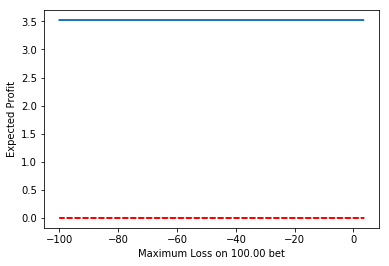

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_rows = 1000 

PRINCIPAL_CENTS = 10000
DOLLARS_TO_CENTS = 100

def _get_expected_outcome(p, odds1, odds2, d1, d2):
    return  p * odds1 * d1 + (1. - p) * odds2 * d2

def _get_outcomes(d1, d2, odds1, odds2):
    principal = d1 + d2
    return (d1 * ODDS1 - principal, d2 * ODDS2 - principal)

def _get_implied_probs(odds1, odds2):
    _p1 = 1. / odds1
    _p2 = 1. / odds2
    tot_prob = _p1 + _p2
    p = _p1 / tot_prob
    return p, 1. - p

def get_loss_curve(odds1, odds2, p=None):
    if p is None:
        p, _ = _get_implied_probs(odds1, odds2)
    all_bets = pd.DataFrame(
        [(float(i), float(PRINCIPAL_CENTS - i)) for i in range(PRINCIPAL_CENTS + 1)],
        columns=['d1', 'd2']
    )
    all_bets /= DOLLARS_TO_CENTS

    total_principal = float(PRINCIPAL_CENTS) / DOLLARS_TO_CENTS
    all_bets['expected_outcome'] = all_bets.apply(
        lambda row: _get_expected_outcome(
            p,
            odds1,
            odds2,
            row['d1'],
            row['d2']
        ),
        axis=1
    ) - total_principal

    all_bets['outcome1'] = all_bets['d1'] * odds1 - total_principal 
    all_bets['outcome2'] = all_bets['d2'] * odds2 - total_principal
    all_bets['max_loss'] = all_bets[['outcome1', 'outcome2']].min(axis=1)
    plt.plot(
        all_bets['max_loss'], 
        all_bets['expected_outcome'],
    )

    horiz_line_data = np.zeros(all_bets.shape[0])
    plt.plot(all_bets['max_loss'], horiz_line_data, 'r--')
    plt.xlabel("Maximum Loss on %.2f bet" % total_principal)
    plt.ylabel("Expected Profit")
    

get_loss_curve(ODDS1, ODDS2)

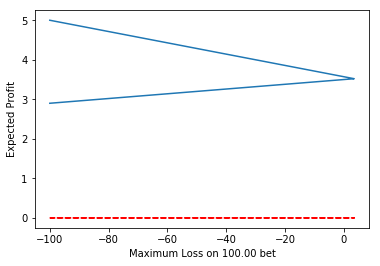

In [5]:
get_loss_curve(ODDS1, ODDS2, p=0.7)

{'implied_probs': (0.7494646680942185, 0.2505353319057815), 'total_prob': (1.1404151404151404,)}


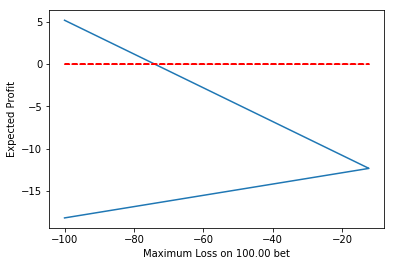

In [6]:
o1 = 1.17
o2 = 3.5

def summarize_odds(o1, o2):
    total_prob = 1. / o1 + 1. / o2,
    return {
        'total_prob': total_prob,
        'implied_probs': _get_implied_probs(o1, o2)
    }
    

summary = summarize_odds(o1, o2)
print summary
p = summary['implied_probs'][0]
get_loss_curve(o1, o2, p - 0.05)

Wow, there's quite a bit of casino arbitrage on this bet! (14%).  We have to take huge risk to have any expected profit.  Let's see what happens if we remove some casino arbitrage by increasing the odds on one of the players...

{'implied_probs': (0.7322175732217574, 0.2677824267782426), 'total_prob': (1.0669642857142856,)}


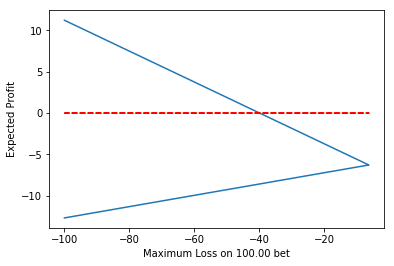

In [8]:
o1 = 1.28
o2 = 3.5

def summarize_odds(o1, o2):
    total_prob = 1. / o1 + 1. / o2,
    return {
        'total_prob': total_prob,
        'implied_probs': _get_implied_probs(o1, o2)
    }
    

summary = summarize_odds(o1, o2)
print summary
p = summary['implied_probs'][0]
get_loss_curve(o1, o2, p - 0.05)

Ah, this is much better!